# **Multiple Linear Regression (MLR)**

**Import Basic Libraries**

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


**Read the dataset**

In [188]:
# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

# **1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

# **Basic Insights of Toyota corolla dataset**

In [189]:
#Print data

data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [190]:
data.shape

(1436, 11)

In [191]:
data.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [192]:
data.tail(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1426,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1427,8950,71,29000,Petrol,86,1,1300,3,4,5,1045
1428,8450,72,26000,Petrol,86,0,1300,3,4,5,1015
1429,8950,78,24000,Petrol,86,1,1300,5,4,5,1065
1430,8450,80,23000,Petrol,86,0,1300,3,4,5,1015
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


# **Summary statistics**

In [193]:
# Display summary statistics
summary_stats = data.describe()

#print(summary_stats)

summary_stats


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [194]:
data.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#**Indentification and Deletion of  Dublicated rows in the dataset**

In [196]:
#print the dublicated rows
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [197]:
data.shape

(1436, 11)

In [198]:
data_cleaned=data.drop_duplicates()

In [199]:
data_cleaned.shape

(1435, 11)

# **Null Values**

In [200]:
missing_values = data_cleaned.isnull().sum()

In [201]:
#Print missing values (Null values if any)

missing_values

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


# **Data Visualisation**

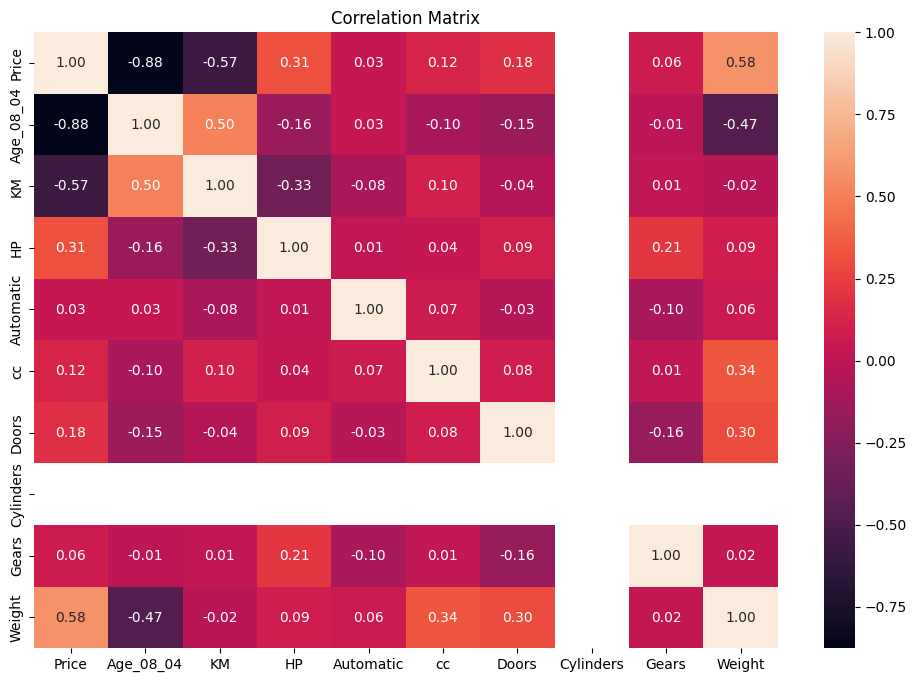

In [202]:
# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns from correlation calculation
correlation_matrix = data_cleaned.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

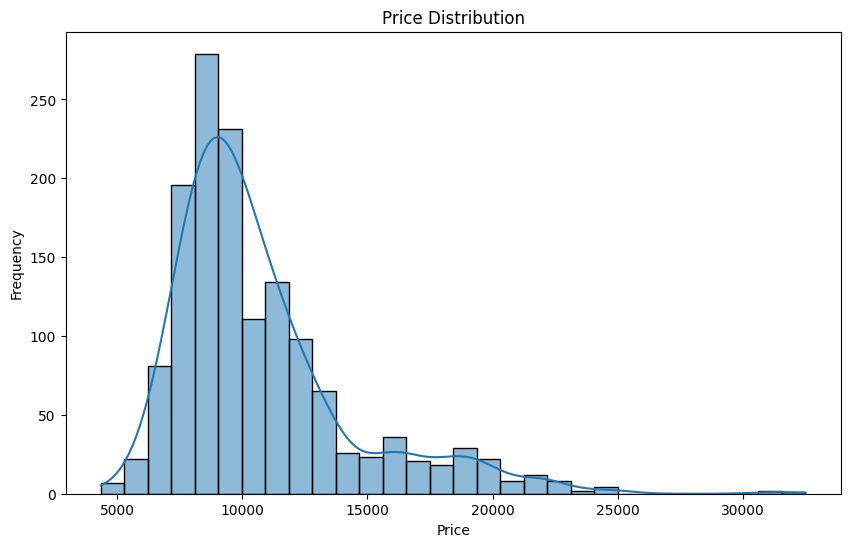

In [203]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# **Data Preprocessing**

In [204]:
#Convert categorical variables using one-hot encoding.

#Handle missing values if any.

# One-hot encoding for FuelType
data1 = pd.get_dummies(data_cleaned, columns=['Fuel_Type'], drop_first=True)


In [205]:

# Check for missing values
print(data1.isnull().sum())


Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [206]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1435 non-null   int64
 1   Age_08_04         1435 non-null   int64
 2   KM                1435 non-null   int64
 3   HP                1435 non-null   int64
 4   Automatic         1435 non-null   int64
 5   cc                1435 non-null   int64
 6   Doors             1435 non-null   int64
 7   Cylinders         1435 non-null   int64
 8   Gears             1435 non-null   int64
 9   Weight            1435 non-null   int64
 10  Fuel_Type_Diesel  1435 non-null   bool 
 11  Fuel_Type_Petrol  1435 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 126.1 KB


In [207]:
data1.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64
Weight,int64


In [208]:
data1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [209]:
# Convert boolean columns to integers
data1['Fuel_Type_Diesel'] = data1['Fuel_Type_Diesel'].astype(int)
data1['Fuel_Type_Petrol'] = data1['Fuel_Type_Petrol'].astype(int)

In [210]:
data1.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64
Weight,int64


In [211]:
data1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


# **2.Split the dataset into training and testing sets (e.g., 80% Training & 20% Testing).**

In [212]:
# Define features and target variable
X = data1.drop('Price', axis=1)
y = data1['Price']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.**

# **Multiple Linear Regression Models**


**Import Basic Libraries**

In [213]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [214]:
# Build the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
coefficients1 = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients1)


                   Coefficient
Age_08_04        -1.212292e+02
KM               -1.599715e-02
HP                1.607544e+01
Automatic         2.688222e+02
cc               -4.710949e-02
Doors            -8.809716e+01
Cylinders         1.136868e-13
Gears             4.550119e+02
Weight            2.636120e+01
Fuel_Type_Diesel -3.896838e+02
Fuel_Type_Petrol  1.128933e+03


# **Model 1**

In [215]:

# Model 1: Using all features
model1 = smf.ols('Price ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Weight + Fuel_Type	', data=data).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:41:48   Log-Likelihood:                -12374.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1426   BIC:                         2.482e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7083.3400   1

# **Model 2**

In [216]:
# Model 2: Removing 'Doors' if it's not significant
model2 = smf.ols('Price ~ Age_08_04 + KM + HP + Automatic + cc + Weight + Fuel_Type', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:41:48   Log-Likelihood:                -12375.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6722.0790   1

# **Model 3**

In [217]:
# Model 3: Removing 'CC','Fuel Type' if it's not significant
model3 = smf.ols('Price ~ Age_08_04 + KM + HP + Weight+Automatic', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1789.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:41:48   Log-Likelihood:                -12384.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3822.0787    940.027     -4.066      0.0

# **Calculating VIF (Variance Inflation Factor)**

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X_train)
print(vif_data)


             Feature          VIF
0          Age_08_04     1.950878
1                 KM     2.043053
2                 HP     2.386329
3          Automatic     1.105248
4                 cc     1.190131
5              Doors     1.226773
6          Cylinders  2291.291102
7              Gears     1.101391
8             Weight     3.810063
9   Fuel_Type_Diesel    11.925015
10  Fuel_Type_Petrol    10.281754


# **4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

# **Evaluate Model Performance**

In [219]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the testing set
y_pred = model3.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1906849.7718946235
R^2 Score: 0.8410578886454011


# **5.Apply Lasso and Ridge methods on the model.**

# **1.Lasso Regression**

In [220]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Mean Squared Error: {lasso_mse}')
print(f'Lasso R² Score: {lasso_r2}')


Lasso Mean Squared Error: 2154744.0166619574
Lasso R² Score: 0.8203950995590717


# **2.Ridge Regression**

In [221]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge Mean Squared Error: {ridge_mse}')
print(f'Ridge R² Score: {ridge_r2}')


Ridge Mean Squared Error: 2155340.2634702823
Ridge R² Score: 0.8203454004542967


# **Interview Questions:-**



# **1.What is Normalization & Standardization and how is it helpful?**


*   **Normalization**  scales the data between 0 and 1, which is useful for
algorithms that depend on the relative distances (e.g., KNN)


*   **Standardization** centers the data around the mean with a standard deviation of 1. This is helpful for algorithms that assume normally distributed data, like linear regression.







# **2.What techniques can be used to address multicollinearity in multiple linear regression?**



*   **Variance Inflation Factor (VIF):** Identify multicollinearity and remove variables with high VIF values.

*   **Regularization techniques:** Use Lasso (L1) or Ridge (L2) regression to penalize large coefficients.

*   **Principal Component Analysis (PCA):** Reduce the dimensionality of the dataset while retaining variance.

